### introduction to Pytorch

In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [2]:
import torchvision
from torchvision import models, transforms

In [3]:
print("Pytorch version: ", torch.__version__)
print('Torchvision version: ', torchvision.__version__)

Pytorch version:  1.5.1
Torchvision version:  0.6.0a0+35d732a


In [4]:
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)
net.eval()

print(net)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/beeyan/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:49<00:00, 11.1MB/s]
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inpla

In [6]:
class BaseTransform():

  """
  画像のサイズをリサイズして, 色を標準化する

  Attributes
  -------------
  resize: int
      リサイズ先の画像の大きさ
  mean: (R, G, B)
      各色チャネルの平均値
  std: (R, G, B)
      各色チャネルの標準偏差
  """

  def __init__(self, resize, mean, std):
    self.base_transform = transforms.Compose([
        transforms.Resize(resize),
        transforms.CenterCrop(resize),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
  
  def __call__(self, img):
    return self.base_transform(img)

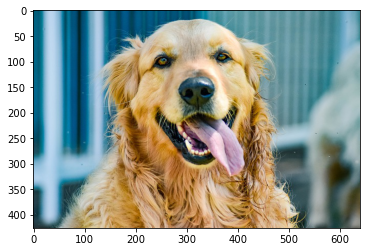

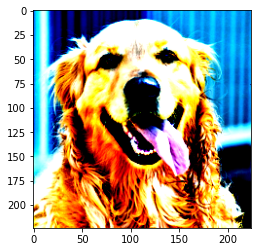

In [8]:
## 作成したクラスの動作確認

# 画像の読み込み
image_file_path = './data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

# 元の画像の表示
plt.imshow(img)
plt.show()

# 画像の前処理と処理済みの画像の表示
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)

# (color, height, width) => (height, width, color)に変換して0,1にクリップ化
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed = np.clip(img_transformed, 0, 1)
plt.imshow(img_transformed)
plt.show()

In [10]:
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))
ILSVRC_class_index

n02823428', 'beer_bottle'],
 '441': ['n02823750', 'beer_glass'],
 '442': ['n02825657', 'bell_cote'],
 '443': ['n02834397', 'bib'],
 '444': ['n02835271', 'bicycle-built-for-two'],
 '445': ['n02837789', 'bikini'],
 '446': ['n02840245', 'binder'],
 '447': ['n02841315', 'binoculars'],
 '448': ['n02843684', 'birdhouse'],
 '449': ['n02859443', 'boathouse'],
 '450': ['n02860847', 'bobsled'],
 '451': ['n02865351', 'bolo_tie'],
 '452': ['n02869837', 'bonnet'],
 '453': ['n02870880', 'bookcase'],
 '454': ['n02871525', 'bookshop'],
 '455': ['n02877765', 'bottlecap'],
 '456': ['n02879718', 'bow'],
 '457': ['n02883205', 'bow_tie'],
 '458': ['n02892201', 'brass'],
 '459': ['n02892767', 'brassiere'],
 '460': ['n02894605', 'breakwater'],
 '461': ['n02895154', 'breastplate'],
 '462': ['n02906734', 'broom'],
 '463': ['n02909870', 'bucket'],
 '464': ['n02910353', 'buckle'],
 '465': ['n02916936', 'bulletproof_vest'],
 '466': ['n02917067', 'bullet_train'],
 '467': ['n02927161', 'butcher_shop'],
 '468': ['n0

In [11]:
class ILSVRCPredictor():
    """
    ILSVRCデータに対するモデルの出力からラベルを求める.
    Attributes
    ----------

    class_index: dictionary
        class indexとラベル名を対応させた辞書型変数
    """

    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        """
        Parameters
        ----------
        out : torch.Size([1, 1000])
            Netからの出力

        Returns
        ----------
        predicted_label_name: str
            最も予測確率が高いラベルの名前
        """
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]

        return predicted_label_name


In [12]:
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))

predictor = ILSVRCPredictor(ILSVRC_class_index)

image_file_path = './data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
inputs = img_transformed.unsqueeze_(0)

out = net(inputs)
result = predictor.predict_max(out)

print("予測結果: ", result)

予測結果:  golden_retriever
